In [11]:
import numpy as np
import os
import torchvision
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [5]:
path = "../../data/processed/videos/"
clips = os.listdir(path)

In [21]:
# Loading number of frames
total_num_frames = [None] * len(clips)

for i, clip in tqdm(enumerate(clips), leave=False, total=len(clips)):
    clip = torchvision.io.read_video(path + clip, pts_unit="sec")[0]
    num_frames = clip.shape[0]
    total_num_frames[i] = num_frames

  0%|          | 0/597 [00:00<?, ?it/s]

Text(0, 0.5, 'Count')

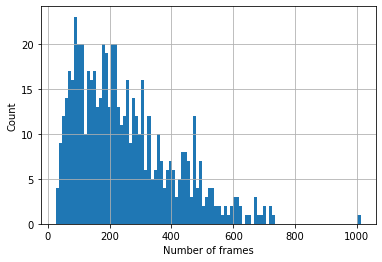

In [30]:
plt.grid()
plt.hist(total_num_frames, bins=100)
plt.xlabel("Number of frames")
plt.ylabel("Count")